In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

In [5]:
with xr.open_dataset('ONCBuoyedProfiler/ONCProfiler2024_2025.nc') as ds:
    display(ds)
    print(ds.time_grid[-1])

<xarray.Dataset> Size: 622MB
Dimensions:                        (time_grid: 39222, depth_bin: 198)
Coordinates:
  * time_grid                      (time_grid) datetime64[ns] 314kB 2024-04-1...
  * depth_bin                      (depth_bin) float64 2kB 0.5 1.5 ... 197.5
Data variables:
    temperature                    (time_grid, depth_bin) float64 62MB ...
    depth                          (time_grid, depth_bin) float64 62MB ...
    seawatertemperature_qaqcFlags  (time_grid, depth_bin) float64 62MB ...
    depth_qaqcFlags                (time_grid, depth_bin) float64 62MB ...
    salinity                       (time_grid, depth_bin) float64 62MB ...
    salinity_qaqcFlags             (time_grid, depth_bin) float64 62MB ...
    oxygen                         (time_grid, depth_bin) float64 62MB ...
    oxygen_qaqcFlags               (time_grid, depth_bin) float64 62MB ...
    chlorophyll                    (time_grid, depth_bin) float64 62MB ...
    chlorophyll_qaqcFlags          (time_grid, depth_bin) float64 62MB ...
Attributes: (12/47)
    Conventions:               CF-1.6
    Metadata_Conventions:      CF-1.6
    title:                     Ocean Networks Canada Gridded Profile Data
    institution:               Ocean Networks Canada
    source:                    Ocean Networks Canada
    history:                   See data product documentation: https://wiki.o...
    ...                        ...
    sea_name:                  
    wmo_id:                    
    naming_authority:          
    keywords:                  MOORINGs, Oceans > Ocean Pressure > Water Pres...
    keywords_vocabulary:       GCMD Science Keywords
    standard_name_vocabulary:  CF-v48

<xarray.DataArray 'time_grid' ()> Size: 8B
array('2025-10-09T14:01:24.176996096', dtype='datetime64[ns]')
Coordinates:
    time_grid  datetime64[ns] 8B 2025-10-09T14:01:24.176996096
Attributes:
    standard_name:  time_grid
    long_name:      gridded time with 0.013889 day intervals
    axis:           T


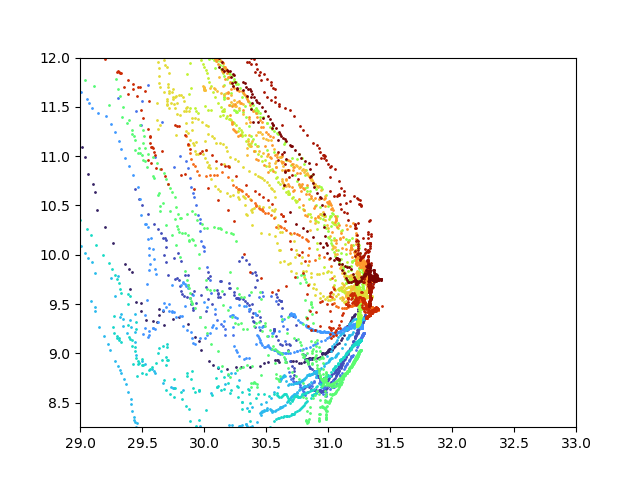

In [ ]:
def decimal_yearday(dt):
    # Ensure dt is a numpy datetime64 with sufficient precision
    dt = np.datetime64(dt, 'ns')

    # Start of the year
    start_of_year = dt.astype('datetime64[Y]')
    # Nanoseconds in a day
    ns_per_day = 24 * 60 * 60 * int(1e9)

    # Elapsed days since the start of the year (as a fraction)
    elapsed_ns = (dt - start_of_year).astype('timedelta64[ns]').astype(float)
    yearday = elapsed_ns / ns_per_day

    return yearday

with xr.open_dataset('./CtdStationGrids/S4.nc') as ds:
    fig, ax = plt.subplots()
    cmap = plt.get_cmap('turbo')
    for i in range(len(ds.time)):
        yday = decimal_yearday(ds.time[i].values)
        if yday > 150:
            dd = ds.time[i] - ds.time[0]
            dd = dd / (ds.time[-1]-ds.time[0])
            col = cmap(dd)

            ax.plot(ds.sal[20:,i], ds.temp[20:, i], '.', markersize=2, color=col)
    ax.set_xlim(29, 33)
    ax.set_ylim(8.25, 12)

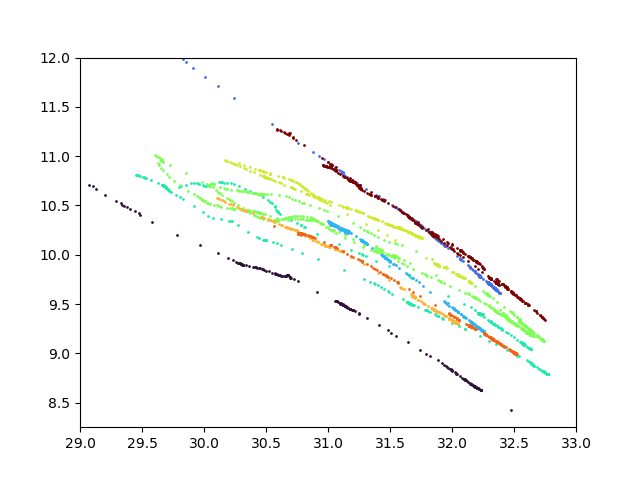

In [ ]:
def decimal_yearday(dt):
    # Ensure dt is a numpy datetime64 with sufficient precision
    dt = np.datetime64(dt, 'ns')

    # Start of the year
    start_of_year = dt.astype('datetime64[Y]')
    # Nanoseconds in a day
    ns_per_day = 24 * 60 * 60 * int(1e9)

    # Elapsed days since the start of the year (as a fraction)
    elapsed_ns = (dt - start_of_year).astype('timedelta64[ns]').astype(float)
    yearday = elapsed_ns / ns_per_day

    return yearday

with xr.open_dataset('./CtdStationGrids/A1.nc') as ds:
    fig, ax = plt.subplots()
    cmap = plt.get_cmap('turbo')
    for i in range(len(ds.time)):
        yday = decimal_yearday(ds.time[i].values)
        if yday > 150:
            dd = ds.time[i] - ds.time[0]
            dd = dd / (ds.time[-1]-ds.time[0])
            col = cmap(dd)

            ax.plot(ds.sal[20:,i], ds.temp[20:, i], '.', markersize=2, color=col)

    ax.set_xlim(29, 33)
    ax.set_ylim(8.25, 12)

In [27]:
ds.time[-1]

<xarray.DataArray 'time' ()>
array('2024-09-25T22:56:09.500000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2024-09-25T22:56:09.500000
    cast     int64 ...

/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_2084/2583585512.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  axs[0].pcolormesh(ds.time, ds.depths, ds.temp, cmap='RdBu_r', vmin=9, vmax=12)
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_2084/2583585512.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  axs[1].pcolormesh(ds.time, ds.depths, ds.sal, vmin=30.5, vmax=31.4)
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_2084/2583585512.py:5: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonicall

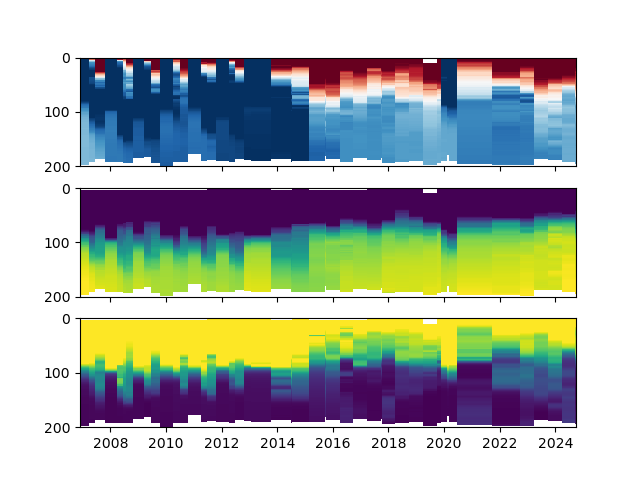

In [ ]:
with xr.open_dataset('./CtdStationGrids/S4.nc') as ds:
    fig, axs = plt.subplots(3, 1, sharey=True, sharex=True)
    axs[0].pcolormesh(ds.time, ds.depths, ds.temp, cmap='RdBu_r', vmin=9, vmax=12)
    axs[1].pcolormesh(ds.time, ds.depths, ds.sal, vmin=30.5, vmax=31.4)
    axs[2].pcolormesh(ds.time, ds.depths, ds.O2, vmin=0, vmax=150)

    axs[2].set_ylim(200, 0)


  #    ax.plot(ds.sal, ds.temp, '.', markersize=1)

In [79]:
ds

<xarray.Dataset>
Dimensions:      (depths: 335, time: 47)
Coordinates:
  * depths       (depths) float64 0.5 1.5 2.5 3.5 ... 331.5 332.5 333.5 334.5
  * time         (time) datetime64[ns] 2007-01-25T10:24:49 ... 2024-09-25T22:...
    cast         (time) int64 ...
Data variables: (12/19)
    temp         (depths, time) float64 nan nan nan nan nan ... nan nan nan nan
    cond         (depths, time) float64 ...
    sal          (depths, time) float64 nan nan nan nan nan ... nan nan nan nan
    pden         (depths, time) float64 ...
    O2           (depths, time) float64 nan nan nan nan nan ... nan nan nan nan
    O2sat        (depths, time) float64 ...
    ...           ...
    alongx       (time) float64 ...
    acrossx      (time) float64 ...
    cond0        (depths, time) float64 ...
    pres         (depths, time) float64 ...
    water_depth  (time) float64 ...
    idfixed      (time) object ...

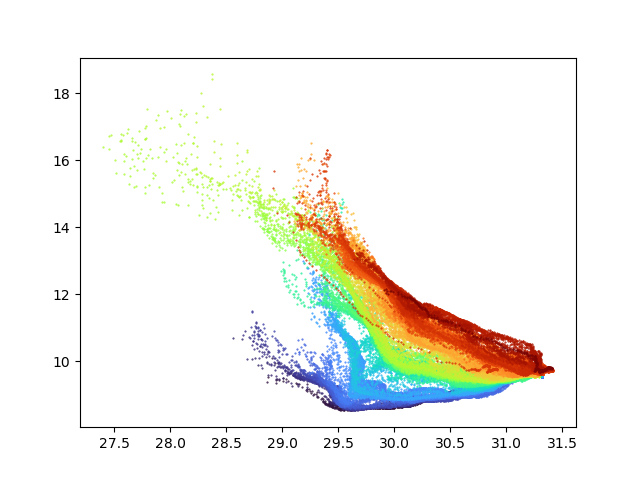

In [22]:
with xr.open_dataset('BPS2024.nc') as ds:
    fig, ax = plt.subplots()
    cmap = plt.get_cmap('turbo')
    for i in range(0, len(ds.time), 20):
        dd = ds.time[i] - ds.time[0]
        dd = dd / (ds.time[-1]-ds.time[0])
        col = cmap(dd)
        ax.plot(ds.salinity[:, i], ds.temperature[:, i], '.', markersize=1, color=col)

## plot map

In [ ]:
with xr.open_dataset()

In [46]:
import scipy.io as sio

In [47]:
dat = sio.loadmat('RegionalData/SItopo.mat')

In [62]:
topo = dat['topo'][0][0][0]
lat = dat['topo'][0][0][2][0]
lon = dat['topo'][0][0][1][0]


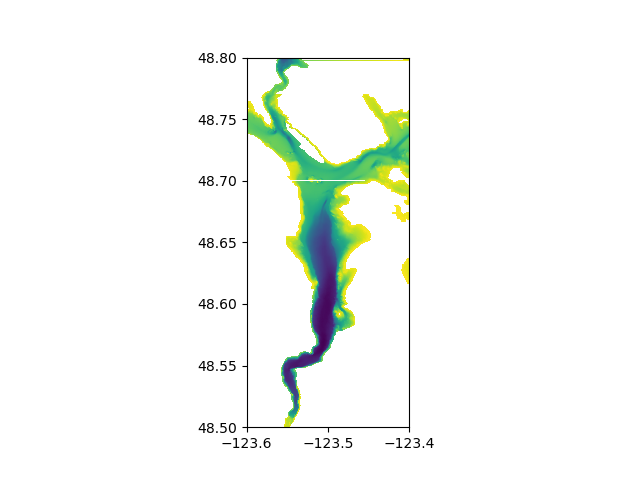

In [64]:
fig, ax = plt.subplots()
ax.pcolormesh(lon, lat, topo)
ax.set_aspect(1/np.cos(48.65*np.pi/180))

In [61]:
lon

-123.6

In [72]:
dat = sio.loadmat('RegionalData/BCRegion_sm.mat')
topo = dat['z']
lat = dat['lat']
lon = dat['lon']

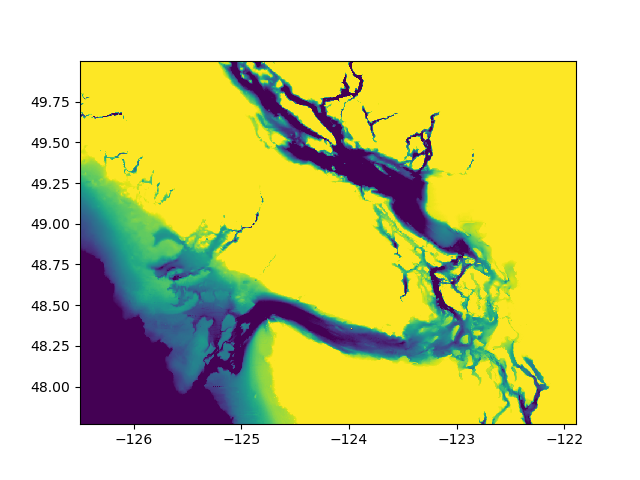

In [77]:
fig, ax = plt.subplots()
ax.pcolormesh(lon, lat, topo,vmin=-200, vmax=0)
ax.set_aspect(1/np.cos(48.65*np.pi/180))

## O2 profiles


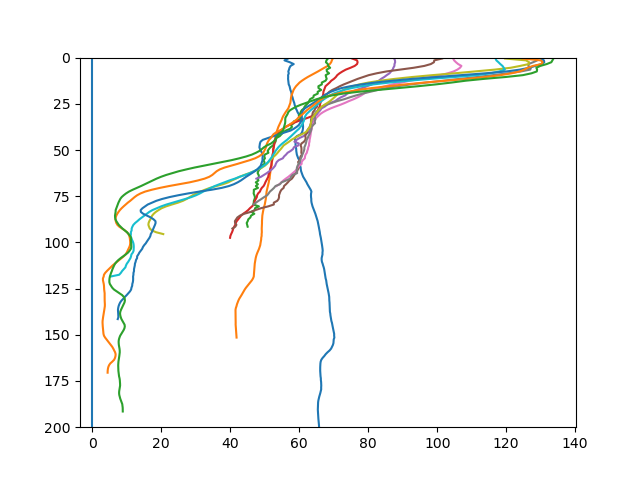

In [108]:
with xr.open_dataset('2024Cruises/20240918/ctd/CtdGridNew.nc') as ds:
    fig, ax = plt.subplots()
    for ii in range(len(ds.time)):
        ax.plot(ds.O2sat[:, ii], ds.depths)
    ax.set_ylim(200, 0)
    ax.axvline(0)

AttributeError: 'Dataset' object has no attribute 'alongx'

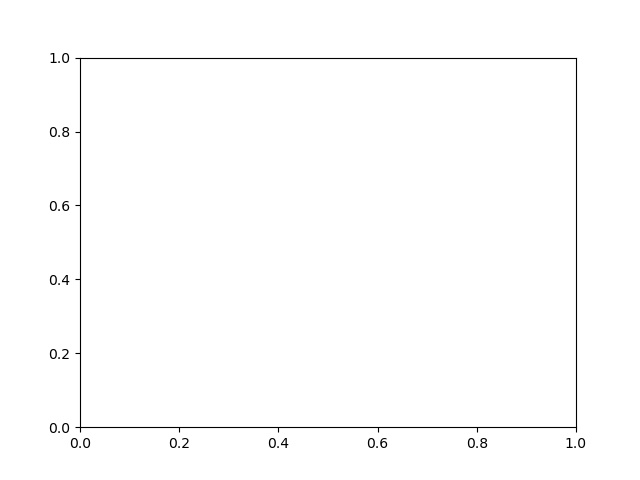

In [111]:
with xr.open_dataset('2007Cruises/200701/ctd/CtdGrid.nc') as ds:
    fig, ax = plt.subplots()
    ax.pcolormesh(ds.alongx, ds.depths, ds.temp)

In [113]:
with xr.open_dataset('2007Cruises/200701/ctd/CtdGrid.nc') as ds:
    display(ds)

<xarray.Dataset>
Dimensions:  (depths: 225, time: 8)
Coordinates:
  * depths   (depths) float64 0.5 1.5 2.5 3.5 4.5 ... 221.5 222.5 223.5 224.5
  * time     (time) datetime64[ns] 2007-01-22T11:53:49 ... 2007-01-24T10:40:55
Data variables:
    temp     (depths, time) float64 ...
    cond     (depths, time) float64 ...
    sal      (depths, time) float64 ...
    pden     (depths, time) float64 ...
    O2       (depths, time) float64 ...
    O2sat    (depths, time) float64 ...
    Flu      (depths, time) float64 ...
    Par      (depths, time) float64 ...
    lat      (time) float64 ...
    lon      (time) float64 ...
    id       (time) object ...
    serial   (time) object ...